<a href="https://colab.research.google.com/github/veapasichnyk/Codveda-Internship-/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-Means Clustering

###Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

###Load data

In [2]:
df = pd.read_csv('churn-bigml-80.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print(df.shape)
print(df.info())
print(df.describe())

(2666, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 

###Preprocessing data

In [5]:
# Drop non-numeric features (you can encode them separately if needed)
features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Area code'])

In [8]:
#Scale the Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

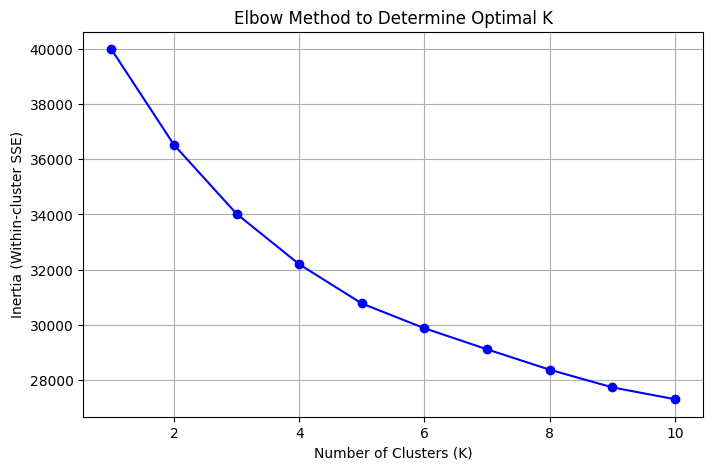

In [9]:
#Determine Optimal Number of Clusters (Elbow Method)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()

Based on the plot, K = 4 is a good choice — it balances between model simplicity and cluster separation.

###KMeans

In [10]:
#Fit KMeans with K = 4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

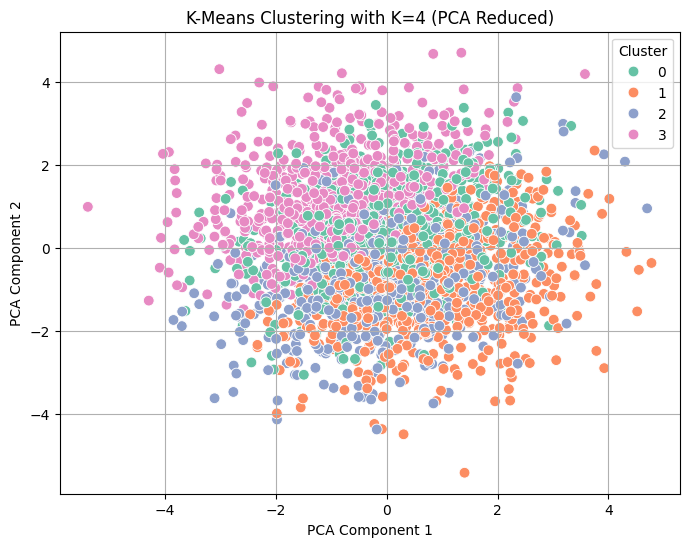

In [11]:
#Visualize the Clusters (PCA to 2D)

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df['Cluster'], palette='Set2', s=60)
plt.title('K-Means Clustering with K=4 (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [12]:
#Summarize cluster characteristics
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         Account length   Area code  Number vmail messages  Total day minutes  \
Cluster                                                                         
0            101.517134  436.263240               8.568536         229.283801   
1             98.540426  436.893617               8.717730         195.405674   
2            101.338633  437.329094               7.344992         145.839905   
3            101.256522  439.189855               7.418841         147.541304   

         Total day calls  Total day charge  Total eve minutes  \
Cluster                                                         
0             102.102804         38.978816         192.007165   
1             101.241135         33.219489         198.616170   
2              98.464229         24.793259         155.668203   
3              99.373913         25.082565         250.755362   

         Total eve calls  Total eve charge  Total night minutes  \
Cluster                                                

**Cluster Interpretation**

1. Cluster 0  - High Daytime Callers, Moderate Churn (18.8%)

- Highest total day minutes (229.3) and charges (38.97)

- Above-average usage overall (except for night)

- Average international and voicemail usage

Churn rate: 18.8% (highest among all clusters)

`Interpretation`: Likely heavy daytime users, possibly business users or those with long daytime conversations. May feel dissatisfied with pricing or support.

2. Cluster 1 -  High Night Users, High Intl Usage, Moderate Churn (17.6%)

- Highest night minutes (255.8) and night charge (11.51)

- Also high international minutes and charges

- Moderate day and evening usage

Churn rate: 17.6%

`Interpretation`: These might be users who talk more during off-peak hours or have international connections. Their churn may be due to pricing on night/international plans.

3. Cluster 2 - Light Users, Low Churn (10.9%)

- Lowest usage across most features (day, evening, night, intl)

- Lowest total charges overall

- Slightly higher customer service calls

Churn rate: 10.9%

`Interpretation`: Likely low-engagement or basic-plan users. Since they're not using much, they’re also not churning at high rates. Possibly not emotionally or financially invested.

4. Cluster 3 - Evening Callers, Lowest Churn (10.7%)

- Highest evening minutes (250.8) and charges (21.31)

- Moderate in all other aspects

Lowest churn: 10.7%

`Interpretation`: May represent social users who talk more in the evening (after work/school). Possibly satisfied with current plans → most stable group.